Analiza akcji Tesla i Gamestop

In [1]:
pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --------------------------- ------------ 2.1/3.0 MB 16.7 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 13.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 9.5 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.1-py3-none-any.whl size=139097 sha256=9f00220c279c1c495f03bbc61a71504ae4898bc07692ea4c6d5809a22ac3a31e
  Stored in directory: c:\users\softl\appdata\local\pip\cache\wheels\1a\57\6a\bb71346381d0d911cd4ce3026f1fa720da76707e4f01cf27dd
Successfully bu

### Question 1: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

Using the Ticker function, enter the ticker symbol of the stock we want to extract data on to create a ticker object.
The stock is Tesla and its ticker symbol is TSLA.

In [2]:
import yfinance as yf

# Create ticker object for Tesla
tesla = yf.Ticker("TSLA")


Using the ticker object and the function history, extract stock information and save it in a dataframe named tesla_data.
Set the period parameter to "max" so we get information for the maximum amount of time.

In [3]:
# Download Tesla stock data
tesla_data = tesla.history(period="max")


Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function.

In [4]:
# Reset index and display first 5 rows
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Question 2: Use Webscraping to Extract Tesla Revenue Data

Using the requests and BeautifulSoup libraries, extract Tesla’s quarterly revenue data from the Macrotrends website.

The URL is:
https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue

In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO  # avoid FutureWarning

# Send a GET request with browser headers
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)

# Parse the HTML content
soup = BeautifulSoup(response.text, "html.parser")
tables = soup.find_all("table")

# Convert HTML tables to string and then to DataFrame
html_table = str(tables)
dfs = pd.read_html(StringIO(html_table))  # <- fixes the FutureWarning

# Select the quarterly revenue table
tesla_revenue = dfs[1]

# Rename columns
tesla_revenue.columns = ["Date", "Revenue"]

# Clean up the Revenue values
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "", regex=False).str.replace(",", "", regex=False)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

# Display the last five rows
tesla_revenue.tail()


,Date,Revenue
59,2010-06-30,28
60,2010-03-31,21
61,2009-12-31,NaN
62,2009-09-30,46
63,2009-06-30,27


### Question 3: Use yfinance to Extract Stock Data

Using the Ticker function, enter the ticker symbol of the stock we want to extract data on to create a ticker object.
The stock is GameStop and its ticker symbol is GME.

In [80]:
import yfinance as yf

# Create ticker object for Tesla
gme = yf.Ticker("GME")
# Download Tesla stock data
gme_data = gme.history(period="max")

Using the ticker object and the history function, extract stock information and save it in a dataframe named gme_data.
Set the period parameter to "max" so we get information for the maximum amount of time.

In [81]:
# Reset index and display first 5 rows
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


Reset the index, save, and display the first five rows of the gme_data dataframe using the head() function.

### Question 4: Use Webscraping to Extract GME Revenue Data



Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

In [48]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

# Fetch the webpage with a browser user-agent
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)

# Parse the HTML content
soup = BeautifulSoup(response.text, "html.parser")
tables = soup.find_all("table")

# Convert HTML table to string and then to a pandas DataFrame
html_table = str(tables)
dfs = pd.read_html(StringIO(html_table))

# Select the correct table (quarterly revenue)
gme_revenue = dfs[1]
gme_revenue.columns = ["Date", "Revenue"]

# Drop rows with missing values
gme_revenue.dropna(inplace=True)

# Display the last five rows
gme_revenue.tail()

,Date,Revenue
61,2010-01-31,"$3,524"
62,2009-10-31,"$1,835"
63,2009-07-31,"$1,739"
64,2009-04-30,"$1,981"
65,2009-01-31,"$3,492"


### Question 5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

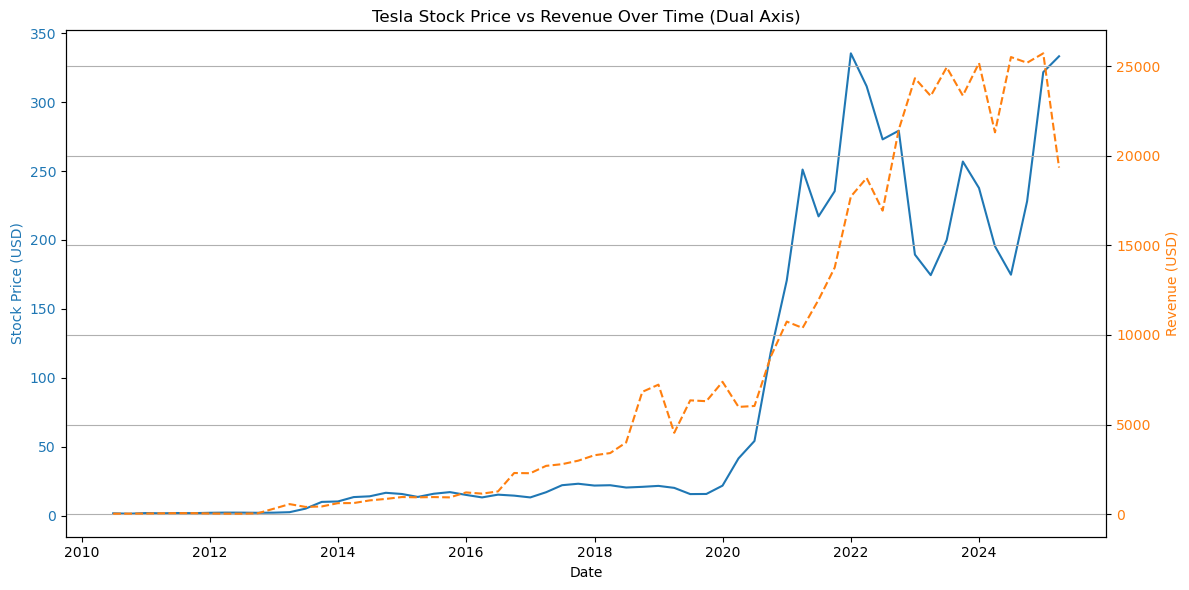

In [38]:
# Plot with dual Y axes
fig, ax1 = plt.subplots(figsize=(12,6))

# Stock Price
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price (USD)', color=color)
ax1.plot(combined.index, combined["Stock Price"], color=color, label="Tesla Stock Price")
ax1.tick_params(axis='y', labelcolor=color)

# Revenue on secondary axis
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Revenue (USD)', color=color)
ax2.plot(combined.index, combined["Revenue"], color=color, linestyle="--", label="Tesla Revenue")
ax2.tick_params(axis='y', labelcolor=color)

# Title and grid
plt.title("Tesla Stock Price vs Revenue Over Time (Dual Axis)")
fig.tight_layout()
plt.grid(True)
plt.show()

### Question 6: Plot GameStop Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

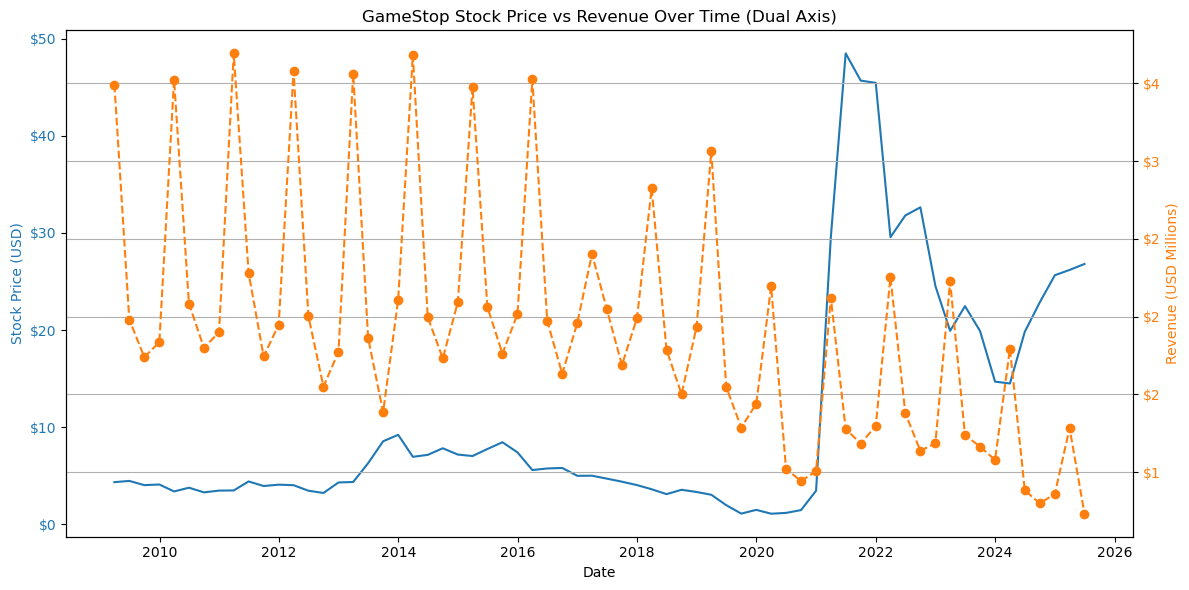

In [84]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax1 = plt.subplots(figsize=(12,6))

# Stock Price
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price (USD)', color=color)
ax1.plot(gme_combined.index, gme_combined["Stock Price"], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))

# Revenue
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Revenue (USD Millions)', color=color)
ax2.plot(gme_combined.index, gme_combined["Revenue"], color=color, linestyle="--", marker='o')
ax2.tick_params(axis='y', labelcolor=color)
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))

plt.title("GameStop Stock Price vs Revenue Over Time (Dual Axis)")
fig.tight_layout()
plt.grid(True)
plt.show()
